In [107]:
print(__doc__)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

Automatically created module for IPython interactive environment


In [108]:
NEW_FEATURE_CSV_PATH="D:/CSE519/Project/allsong_feature.csv"
DF_TRAIN_PATH="D:/CSE519/Project/fixed_train_v1.csv"
DF_TEST_PATH="D:/CSE519/Project/fixed_test_v1.csv"
ALL_SONG_PATH="D:/CSE519/Project/billboard_w_new_features_v7.csv"

In [109]:
# allSong_feature=pd.read_csv(NEW_FEATURE_CSV_PATH,sep='\t')
# allSong_feature.drop("Unnamed: 0", inplace=True,axis=1)

In [110]:
# df_train = allSong_valid.sample(frac=0.8)
# df_test = allSong_valid.loc[~allSong_valid.index.isin(df_train.index)]
# df_train.to_csv(DF_TRAIN_PATH,index=False)
# df_test.to_csv(DF_TEST_PATH, index=False)

In [111]:
df_train=pd.read_csv(DF_TRAIN_PATH)
df_test=pd.read_csv(DF_TEST_PATH)

In [112]:
print(list(df_train))

['url', 'weekid', 'week_position', 'song', 'performer', 'songid', 'instance', 'previous_week_position', 'rank', 'weeks_on_chart', 'year', 'week', 'jump_time', 'max_jump_duration', 'strict_rule', 'lenient_rule', 'all_time_greatest_artist', 'artist_died', 'christmas', 'church', 'classical', 'in_commercials', 'concerts', 'easter', 'fourth_of_july', 'funerals', 'graduations', 'grammys', 'halloween', 'in_movie_clueless', 'in_movies', 'in_plays', 'in_tv_shows', 'karaoke', 'lullabies', 'mtv_awards', 'phone_call', 'politicians', 'sporting_events', 'tv_show_theme', 'weddings', 'won_oscars', 'wordcup', 'popularity', 'diff_year', 'adjusted_diff_year', 'log_rank', 'log_reverse_rank', 'log_weeks_on_chart', 'log_jump_time', 'log_max_duration', 'continue_week', 'reverse_rank']


# initial correlation check

In [113]:
corr = df_train.corr()
corr.style.background_gradient()

C:\Users\shengchun\Anaconda3\envs\python36\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


# drop unnecessary columns (with Nan correlation)

In [71]:
columns_todrop = ['url','instance','week_position', 'previous_week_position', 'classical','easter',\
                  'lenient_rule', 'adjusted_diff_year', 'log_rank','log_reverse_rank', \
                  'log_weeks_on_chart','log_jump_time', 'log_max_duration', 'week', 'rank']
df_train.drop(columns_todrop, inplace=True,axis=1)
df_test.drop(columns_todrop, inplace=True,axis=1)




# continue_week 0.4754035528044198
# reverse_rank 0.34444040431444356



# df_train.rename(columns = {'commercials':'in_commercial', 'graduations':'in_graduation_ceremony',\
#                 'grammys':'won_grammy','inmovies':"in_movies","intvshows":'in_TVshows',\
#                 "karaoke":"in_karaoke","mtvawards":"won_MTVawards"},\
#                 inplace = True)
# df_test.rename(columns = {'commercials':'in_commercial', 'graduations':'in_graduation_ceremony',\
#                 'grammys':'won_grammy','inmovies':"in_movies","intvshows":'in_TVshows',\
#                 "karaoke":"in_karaoke","mtvawards":"won_MTVawards"},\
#                 inplace = True)

# more corrleation plot 

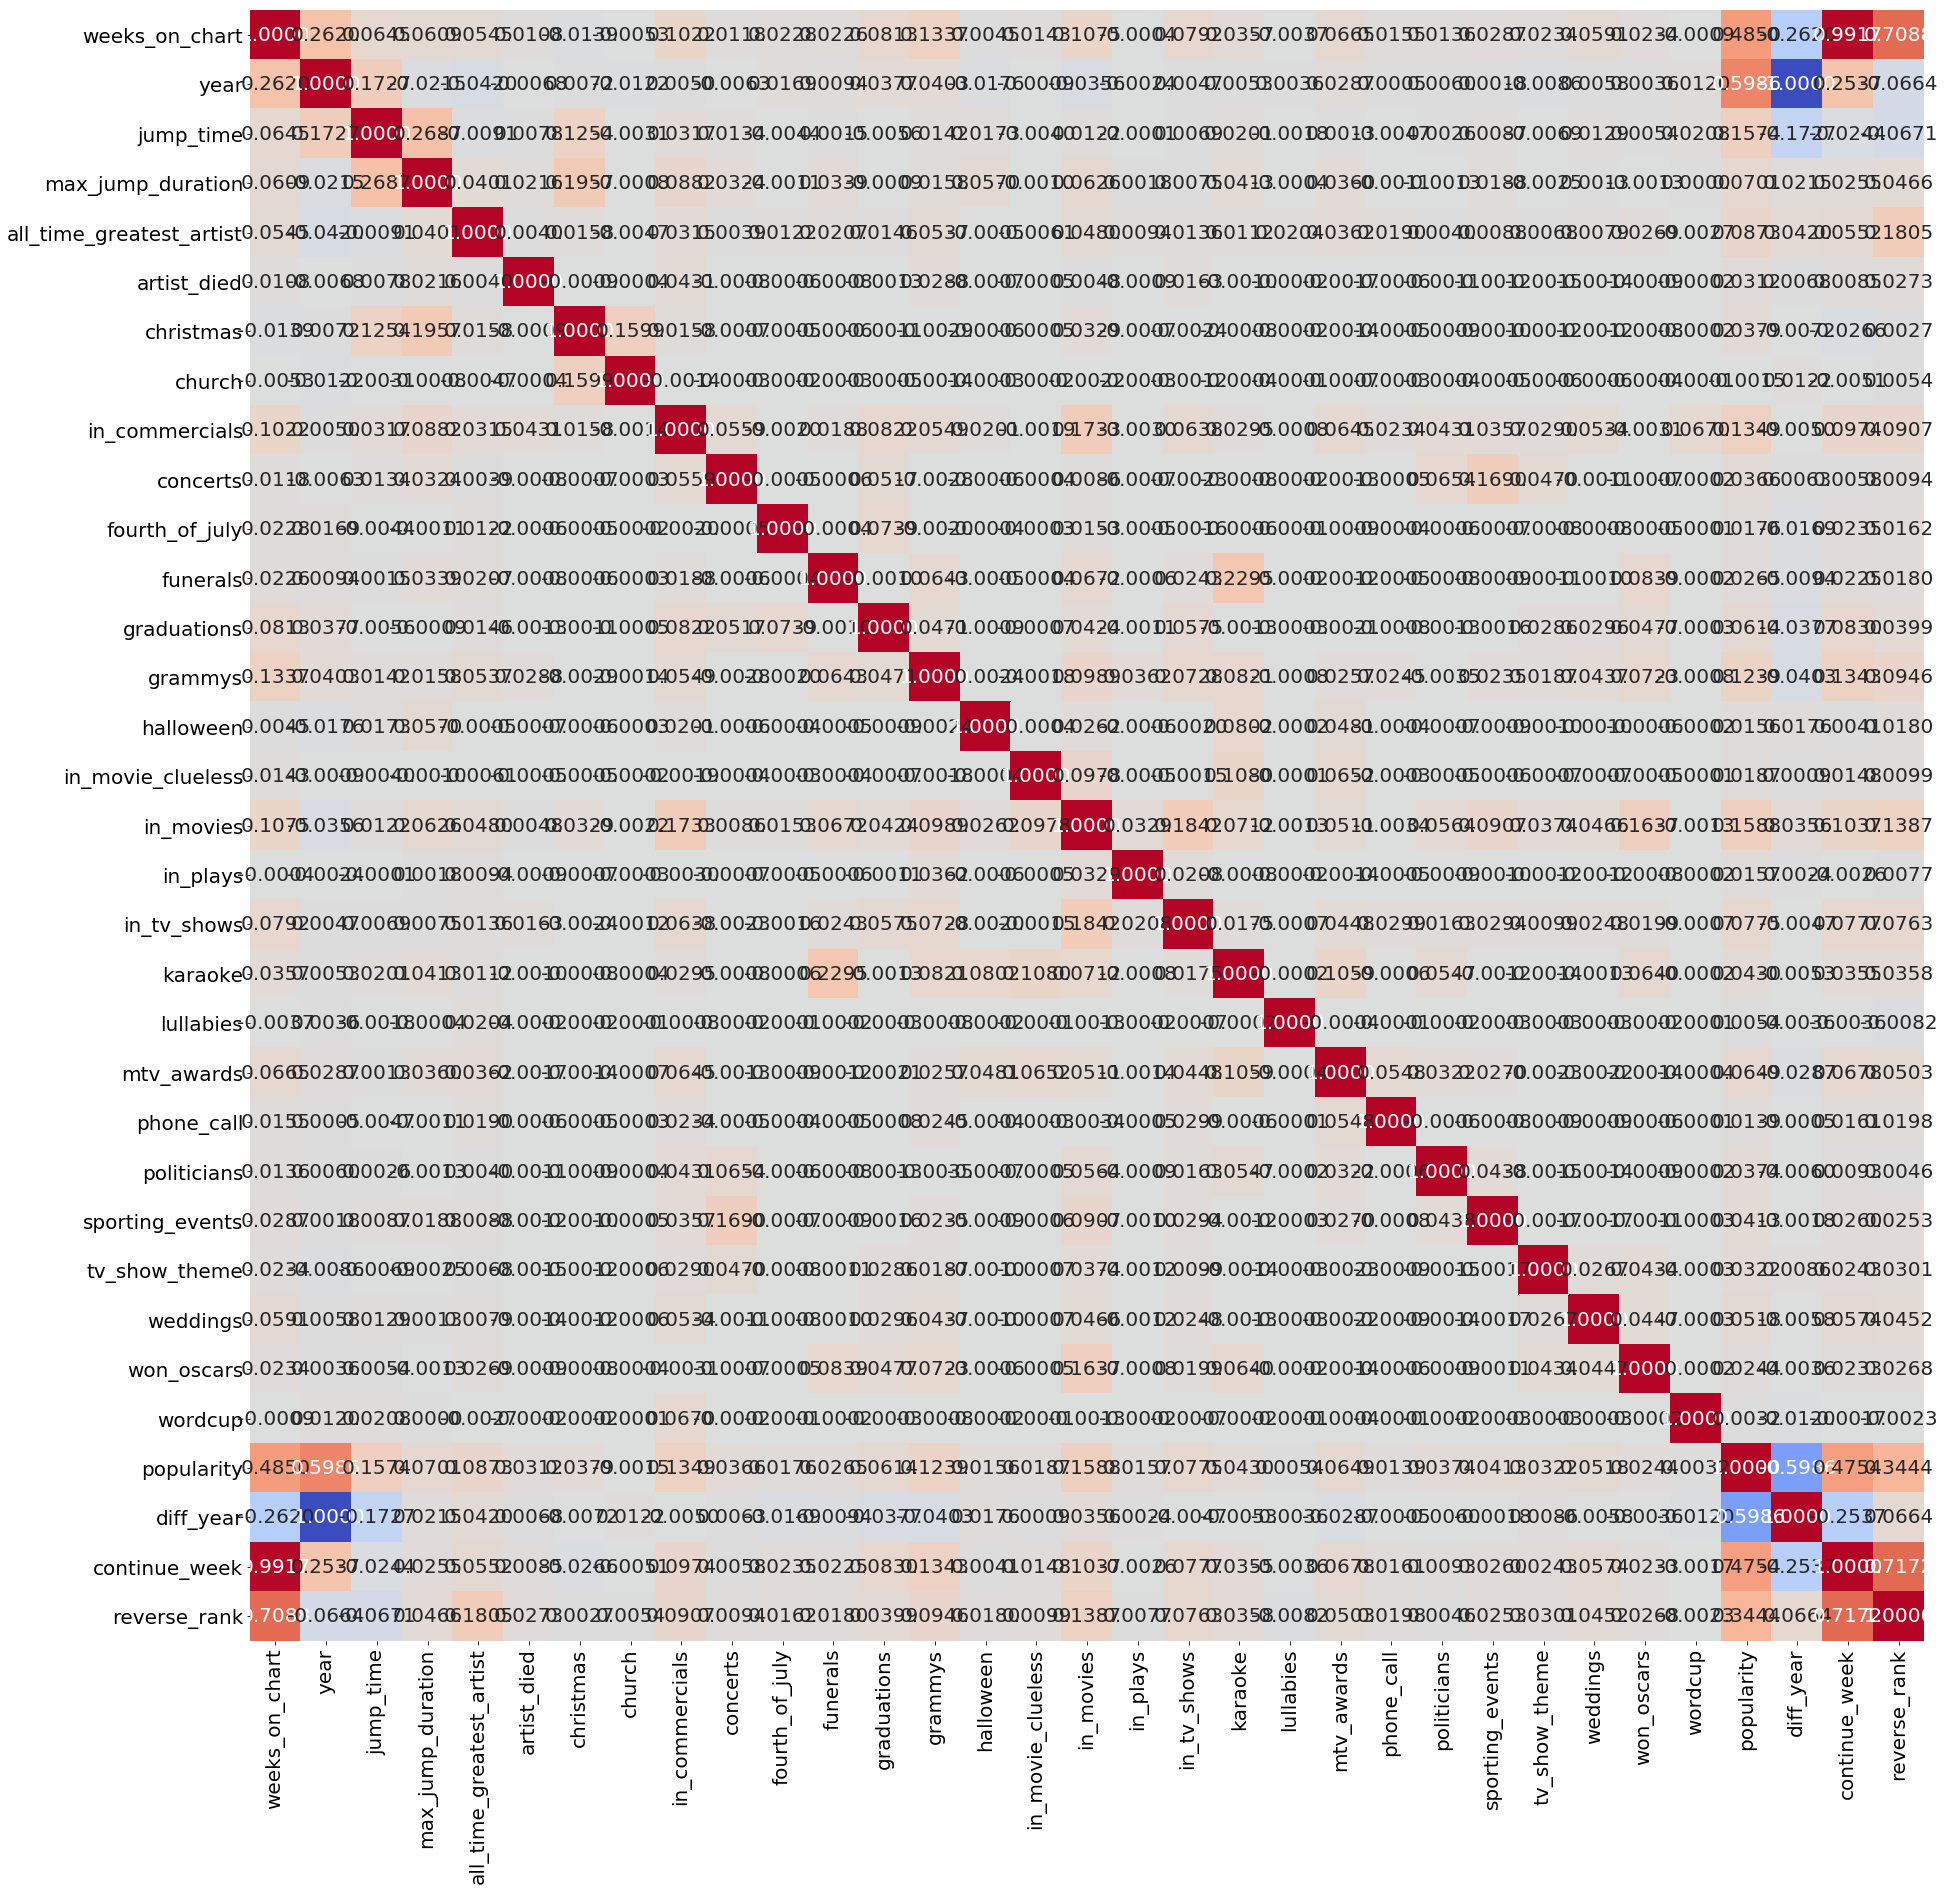

In [72]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(df_train.corr(method='pearson'), annot=True, fmt='.4f', 
            cmap=plt.get_cmap('coolwarm'), cbar=False, ax=ax)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
# plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)
plt.show()

# select features use in machine learning model based on the correlation values 

In [73]:
def select_feature_to_keep(df, correlation_bar=0.05):
    corr = df.corr()
    all_features=list(corr)
    print(len(all_features))   
    corr.head()
    strict_rule_corr=corr.loc['popularity']
    for feature in all_features:
        print(feature+" " +str(strict_rule_corr[feature]))   
    feature_to_keep=[]
    for feature in all_features:
        if (abs(strict_rule_corr[feature])>correlation_bar):
            feature_to_keep.append(feature)
    feature_to_keep.remove('popularity')  
    
    print(len(feature_to_keep)) 
    for feature in feature_to_keep:
        print(feature+" " +str(strict_rule_corr[feature]))
    return feature_to_keep

In [74]:
feature_to_keep=select_feature_to_keep(df_train, 0.05) # select all the features that with correlation coefficient greater than 0.05

33
weeks_on_chart 0.48499513180479403
year 0.5985850329161911
jump_time 0.15743862493474414
max_jump_duration 0.07014797033962451
all_time_greatest_artist 0.08730947161091611
artist_died 0.031241702088301855
christmas 0.03786044783641844
church -0.0014752776046199647
in_commercials 0.1348527136740972
concerts 0.03658555329037251
fourth_of_july 0.01764435716119131
funerals 0.02648681011459389
graduations 0.06135434719288863
grammys 0.12392418983577817
halloween 0.01563084162415235
in_movie_clueless 0.01872638985276465
in_movies 0.15881094725132294
in_plays 0.0157183878498843
in_tv_shows 0.07746264756338117
karaoke 0.04303342524883263
lullabies 0.005371824227961078
mtv_awards 0.0649069272215646
phone_call 0.01393810622021694
politicians 0.037375818582152776
sporting_events 0.041276489013838284
tv_show_theme 0.03220138714942026
weddings 0.05183814552833948
won_oscars 0.024413413682509915
wordcup 0.003175284712919938
popularity 1.0
diff_year -0.5985850329161921
continue_week 0.475403552804

In [75]:
all_feature=list(df_train)
print(feature_to_keep)
feature_to_drop=[item for item in all_feature if item not in feature_to_keep]
feature_to_drop.remove("popularity")
print(feature_to_drop)
df_train.drop(feature_to_drop, inplace=True,axis=1)
df_test.drop(feature_to_drop, inplace=True,axis=1)

['weeks_on_chart', 'year', 'jump_time', 'max_jump_duration', 'all_time_greatest_artist', 'in_commercials', 'graduations', 'grammys', 'in_movies', 'in_tv_shows', 'mtv_awards', 'weddings', 'diff_year', 'continue_week', 'reverse_rank']
['weekid', 'song', 'performer', 'songid', 'artist_died', 'christmas', 'church', 'concerts', 'fourth_of_july', 'funerals', 'halloween', 'in_movie_clueless', 'in_plays', 'karaoke', 'lullabies', 'phone_call', 'politicians', 'sporting_events', 'tv_show_theme', 'won_oscars', 'wordcup']


In [76]:
print(df_train.shape)
print(df_test.shape)
df_train.head()

(17924, 16)
(4482, 16)


,weeks_on_chart,year,jump_time,max_jump_duration,all_time_greatest_artist,in_commercials,graduations,grammys,in_movies,in_tv_shows,mtv_awards,weddings,popularity,diff_year,continue_week,reverse_rank
0,16,1988,0,0,1,0,0,0,0,0,0,0,40,30,16,100
1,10,1968,0,0,0,0,0,0,1,0,0,0,49,50,10,97
2,15,2000,0,0,0,0,0,0,0,0,0,0,40,18,15,66
3,5,1967,0,0,0,0,0,0,0,0,0,0,31,51,5,46
4,21,1983,0,0,0,0,0,0,0,0,0,0,31,35,21,83


# After remove the features that has a correlation coefficient less than the bar correlation coefficient

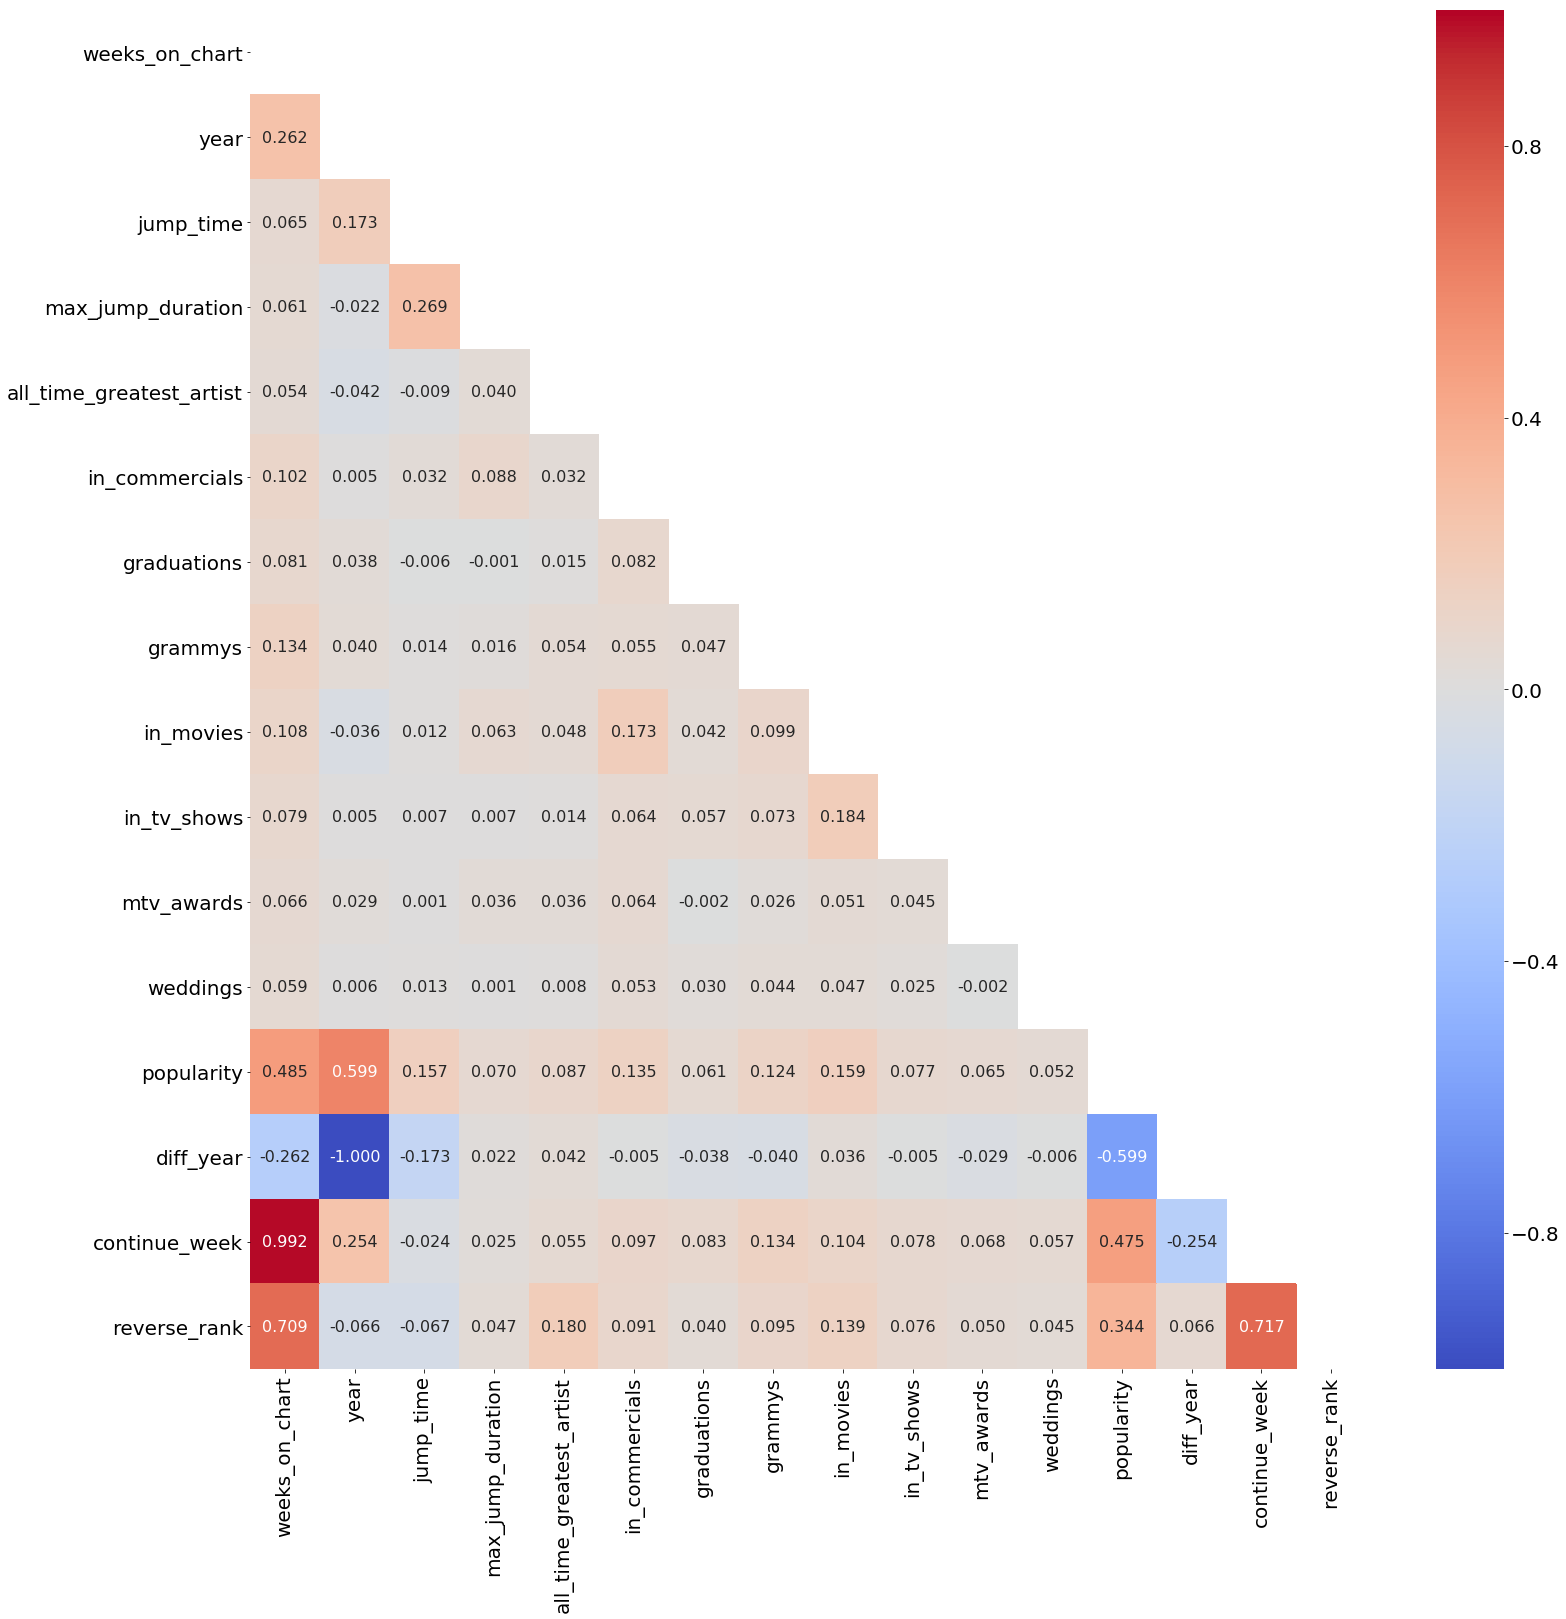

In [77]:
# corr = df_train.corr()
# corr.style.background_gradient()
#df_train.rename(columns = {'commercials':'popularity'}, inplace = True)
#df_test.rename(columns = {'strict_rule':'popularity'}, inplace = True)
# print(list(df_train))
# df_train_no_year=df_train.drop(['year'],axis=1)
corr = df_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df_train.corr(method='pearson'), annot=True, fmt='.3f', 
            cmap=plt.get_cmap('coolwarm'), annot_kws={'size':16}, cbar=True, ax=ax, mask=mask)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal")
plt.savefig('result.png', bbox_inches='tight', pad_inches=0.0)

# Random forest machine learning model 

In [78]:
def  random_forest_machine_learning(df_train, df_test,feature_to_keep, max_depth=3, random_state=0, n_estimators=100):
    X=np.array(df_train[feature_to_keep].values)
    print(X.shape)
    y=np.array(df_train['popularity'].values)
    print(y.shape)
    regr = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
    regr.fit(X, y)
    RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
    print(regr.feature_importances_)
    X_test=np.array(df_test[feature_to_keep].values)
    pred_test=regr.predict(X_test)
    df_test.insert(df_test.shape[1], column='pred_randomForest', value=pred_test)  

In [79]:
random_forest_machine_learning(df_train, df_test, feature_to_keep, max_depth=3, random_state=0, n_estimators=100)

(17924, 15)
(17924,)
[0.29691696 0.37229559 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.29903061 0.01675803 0.01499882]


# absolute error and MSE of df_test

In [80]:
year_array=[]
mean_square_error_array=[]
mean_absolute_error_array=[]
test_yearGroup=df_test.groupby('year')
for idx, group in test_yearGroup:
    error_array=np.array(group['pred_randomForest']-group['popularity'])
    mean_square_error=np.sum(np.square(error_array))/error_array.size
    mean_abs_error=np.absolute(error_array)
    mean_absolute_error=np.sum(mean_abs_error)/mean_abs_error.size
    year_array.append(idx)
    mean_square_error_array.append(mean_square_error)
    mean_absolute_error_array.append(mean_absolute_error)
    print("mean absolute error in year "+ str(idx)+ " is " + str(mean_absolute_error) )
    print("mean square error in year "+ str(idx )+ " is "+ str(mean_square_error))

mean absolute error in year 1958 is 17.591679006707988
mean square error in year 1958 is 423.2080036762951
mean absolute error in year 1959 is 15.872644269097481
mean square error in year 1959 is 329.6363997270317
mean absolute error in year 1960 is 15.204709172154145
mean square error in year 1960 is 320.9242201740368
mean absolute error in year 1961 is 13.529573737705137
mean square error in year 1961 is 257.32786351350387
mean absolute error in year 1962 is 12.156542150521938
mean square error in year 1962 is 196.4975345602188
mean absolute error in year 1963 is 13.355013802710634
mean square error in year 1963 is 227.55977560722778
mean absolute error in year 1964 is 13.162047753650654
mean square error in year 1964 is 222.79359305259368
mean absolute error in year 1965 is 13.167447176247476
mean square error in year 1965 is 251.92683917726004
mean absolute error in year 1966 is 12.935377720078439
mean square error in year 1966 is 255.52453320845956
mean absolute error in year 1967

In [90]:
def print_statistics_error_info(df, popularity, predicted_popularity):
    print('Mean Absolute Error is', mean_absolute_error(df[popularity], df[predicted_popularity]))
    print('Median Absolute Error is', median_absolute_error(df[popularity], df[predicted_popularity]))
    print('Mean Squared Error of is', mean_squared_error(df[popularity], df[predicted_popularity]))

# Decision Tree with fixed train and fixed test -by popularity

In [104]:
def decision_tree(df_train, df_test,feature_to_keep, max_depth=3):
    X=np.array(df_train[feature_to_keep].values)
    y=np.array(df_train['popularity'].values)
   
    # Fit regression model
    regr_ = DecisionTreeRegressor(max_depth=max_depth)
    regr_.fit(X, y) 
    
    # Predict
    X_test = np.array(df_test[feature_to_keep].values)       
    pred_test=regr_.predict(X_test) 
    pred_train = regr_.predict(X)    
    
    df_test.insert(df_test.shape[1], column='pred_decisionTree', value=pred_test) 
    print(list(df_test))
    df_train.insert(df_train.shape[1], column='pred_decisionTree', value=pred_train)    

In [105]:
decision_tree(df_train, df_test,feature_to_keep, max_depth=3)

['weeks_on_chart', 'year', 'jump_time', 'max_jump_duration', 'all_time_greatest_artist', 'in_commercials', 'graduations', 'grammys', 'in_movies', 'in_tv_shows', 'mtv_awards', 'weddings', 'popularity', 'diff_year', 'continue_week', 'reverse_rank', 'pred_randomForest', 'pred_decisionTree']


In [106]:
print_statistics_error_info(df_test,popularity='popularity', predicted_popularity='pred_decisionTree')

Mean Absolute Error is 11.849207835833926
Median Absolute Error is 10.349411764705884
Mean Squared Error of is 215.89219932284044
